<a href="https://colab.research.google.com/github/hoanghoc/ml-class/blob/master/AnyimageClass.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip list

In [26]:
!pip install tensorflow tensorflow-gpu opencv-python matplotlib

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 588.3 MB 21 kB/s 
     |████████████████████████████████| 578.1 MB 8.5 kB/s 
     |████████████████████████████████| 578.1 MB 7.5 kB/s 
     |████████████████████████████████| 511.8 MB 27 kB/s 


In [1]:
import tensorflow as tf
import os

In [2]:
gpus=tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus:
  tf.config.experimental.set_memory_growth(gpu,True)
  

In [3]:
tf.config.list_physical_devices('GPU')

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [4]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [5]:
%pwd
%ls

drive/  sample_data/


In [6]:
cd drive/MyDrive/Colab\ Notebooks

/content/drive/MyDrive/Colab Notebooks


# Remove doggy images

In [7]:
import cv2
import imghdr
import matplotlib as plt

In [8]:
data_dir='Database/data'

In [9]:
images_exts=['jpeg','jpg','bmp','png']

In [12]:
for image_class in os.listdir(data_dir):
  for image in os.listdir(os.path.join(data_dir,image_class)):
    image_path=os.path.join(data_dir,image_class,image)
    try:
      img=cv2.imread(image_path) # dinh nghia dinh dang file
      tip=imghdr.what(image_path)
      if tip not in images_exts:
        print("image not in ext list{}".format(image_path))
        os.remove(image_path)
    except Exception as e:
      print('Issue with image{}'.format(image_path))


Load data

In [13]:
import numpy as np
from matplotlib import pyplot as plt 
import tensorflow as tf

In [14]:
data=tf.keras.utils.image_dataset_from_directory(data_dir)


Found 315 files belonging to 2 classes.


In [15]:
data_iter=data.as_numpy_iterator()
print(a for a in data_iter)

<generator object <genexpr> at 0x7fb2de1cb6d0>


In [16]:
batch=data_iter.next()

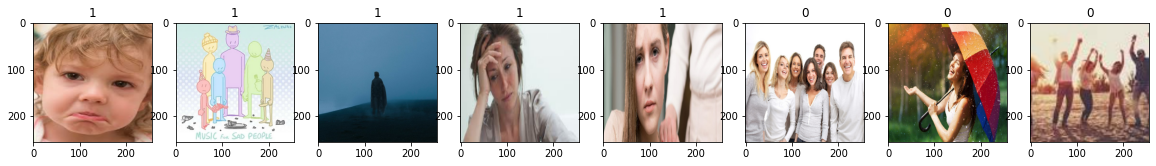

In [17]:
fig,ax=plt.subplots(ncols=8,figsize=(20,20))
for idx,img in enumerate(batch[0][:8]):
  ax[idx].imshow(img.astype(int))
  ax[idx].title.set_text(batch[1][idx])
  #print(batch[1][idx])

Scale data

In [ ]:
data=data.map(lambda x,y:(x/255,y))

data.as_numpy_iterator().next()

Split Data

In [21]:
train_size=int(len(data)*.7)
val_size=int(len(data)*0.2)
test_size=int(len(data)*0.1)




In [44]:
train=data.take(train_size)
val=data.skip(train_size).take(val_size)
test=data.skip(train_size+val_size).take(test_size)

Build Deep learning Model

In [45]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D,Dense,Flatten,Dropout
model =Sequential()

In [46]:
model.add(Conv2D(16,(3,3),1, activation='relu',input_shape=(256,256,3)))
model.add(MaxPooling2D())
model.add(Conv2D(32,(3,3),1,activation='relu'))
model.add(MaxPooling2D())
model.add(Conv2D(16,(3,3),1,activation='relu'))
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dense(256,activation='relu'))
model.add(Dense(1,activation='sigmoid'))


In [47]:
model.compile('adam',loss=tf.losses.BinaryCrossentropy(),metrics=['accuracy'])
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_7 (Conv2D)           (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 127, 127, 16)     0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 62, 62, 32)       0         
 2D)                                                             
                                                                 
 conv2d_9 (Conv2D)           (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 30, 30, 16)      

Train

In [48]:
logdir='logs'

In [49]:
tensorboad_callback=tf.keras.callbacks.TensorBoard(log_dir=logdir)
history=model.fit(train,epochs=20,validation_data=val,callbacks=[tensorboad_callback])

Epoch 1/20
7/7 [==============================] - 10s 949ms/step - loss: 0.8717 - accuracy: 0.4732 - val_loss: 0.6906 - val_accuracy: 0.4219
Epoch 2/20
7/7 [==============================] - 7s 681ms/step - loss: 0.6055 - accuracy: 0.6429 - val_loss: 0.5030 - val_accuracy: 0.9219
Epoch 3/20
7/7 [==============================] - 8s 927ms/step - loss: 0.5375 - accuracy: 0.7768 - val_loss: 0.7103 - val_accuracy: 0.5938
Epoch 4/20
7/7 [==============================] - 8s 925ms/step - loss: 0.4979 - accuracy: 0.7812 - val_loss: 0.4091 - val_accuracy: 0.8594
Epoch 5/20
7/7 [==============================] - 8s 929ms/step - loss: 0.4447 - accuracy: 0.8616 - val_loss: 0.4475 - val_accuracy: 0.7344
Epoch 6/20
7/7 [==============================] - 8s 746ms/step - loss: 0.3951 - accuracy: 0.8259 - val_loss: 0.2991 - val_accuracy: 0.8750
Epoch 7/20
7/7 [==============================] - 8s 683ms/step - loss: 0.2607 - accuracy: 0.9330 - val_loss: 0.1369 - val_accuracy: 0.9688
Epoch 8/20
7/7 [===

Plot Performanc

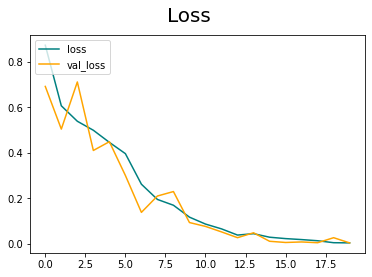

In [52]:
fig=plt.figure()
plt.plot(history.history['loss'],color='teal',label='loss')
plt.plot(history.history['val_loss'],color='orange',label='val_loss')
fig.suptitle('Loss ',fontsize=20)
plt.legend(loc="upper left")
plt.show()

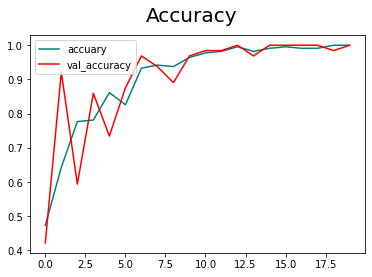

In [54]:
fig=plt.figure()
plt.plot(history.history['accuracy'],color='teal',label='accuary')
plt.plot(history.history['val_accuracy'],color='red',label='val_accuracy')
fig.suptitle('Accuracy',fontsize=20)
plt.legend(loc="upper left")
plt.show()

Evaluate

In [56]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy


In [57]:
pre=Precision()
re=Recall()
acc=BinaryAccuracy()

In [58]:
for batch in test.as_numpy_iterator():
  X,y=batch
  yhat=model.predict(X)
  pre.update_state(y,yhat)
  re.update_state(y,yhat)
  acc.update_state(y,yhat)

print(pre.result(),re.result(),acc.result())

1/1 [==============================] - 0s 320ms/step
tf.Tensor(1.0, shape=(), dtype=float32) tf.Tensor(1.0, shape=(), dtype=float32) tf.Tensor(1.0, shape=(), dtype=float32)


Test

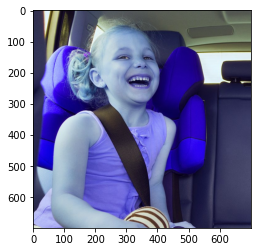

In [85]:
import cv2
img=cv2.imread('hh.jpg')
plt.imshow(img)

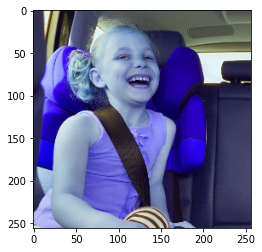

In [98]:
resized_img=tf.image.resize(img,(256,256))
plt.imshow(resized_img.numpy().astype(int))
plt.show()

In [99]:
y_hat=model.predict(np.expand_dims(resized_img/255,0))
y_hat

1/1 [==============================] - 0s 47ms/step


array([[0.38107318]], dtype=float32)

In [94]:
if y_hat>0.5:
  print(f'Predicted class is Sad')
else:
  print(f'Predicted class is Happy')

Predicted class is Happy


Save model to google drive

In [90]:
from tensorflow.keras.models import load_model
model.save(os.path.join('models','imageclassifier.h5'))

Load model

In [96]:
new_model=load_model('models/imageclassifier.h5')

Predict object with trained model

In [100]:
new_model.predict(np.expand_dims(resized_img/255,0))

1/1 [==============================] - 0s 29ms/step


array([[0.38107318]], dtype=float32)